In [99]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pandas as pd

## Creating the function for extracting data.

In [100]:
num_points = 100
dx = 2/num_points
x_loc = np.linspace(-1,1,num_points)
y_loc = -np.sin(np.pi*x_loc)
mu = 0.01

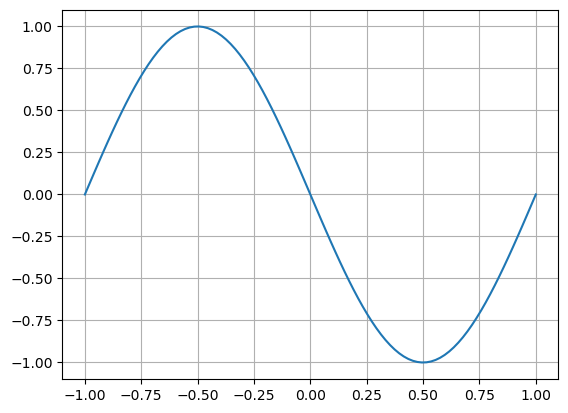

In [101]:
plt.plot(x_loc,y_loc)
plt.grid()

In [102]:
time_loc = np.linspace(0,0.5,10000)
dt = 0.5/10000
Y_rec = np.array([y_loc])

In [103]:
#Y_rec = np.append(Y_rec,[y_loc], axis=0)

In [104]:
for i in range(len(time_loc)):
    temp_y = y_loc.copy()
    dy_dx = np.zeros(num_points)
    d2y_dx = np.zeros(num_points)

    dy_dx[1:-1] = (temp_y[1:-1] - temp_y[:-2])/dx
    dy_dx[0] = (temp_y[0] - temp_y[-2])/dx
    dy_dx[-1] = (temp_y[-1] - temp_y[-2])/dx

    d2y_dx[1:-1] = (temp_y[:-2] - 2*temp_y[1:-1] + temp_y[2:]) / dx**2
    d2y_dx[0] = (temp_y[1] - 2*temp_y[0] + temp_y[-2]) / dx**2
    dy_dx[-1] = (temp_y[1] - 2*temp_y[-1] + temp_y[-2]) / dx**2

    #for j in range(num_points):
    #    dy_dx[j] = (temp_y[(j+1)%num_points] -temp_y[(j-1)%num_points])/(dx)
    #
    #for k in range(num_points):
    #    d2y_dx[k] = (temp_y[(k+1)%num_points] -2*temp_y[k] + temp_y[(k+1)%num_points])/dx**2

    dy = dt*(mu*d2y_dx - y_loc*dy_dx)
    y_loc = y_loc + dy
    #y_loc[0] = 0
    Y_rec = np.append(Y_rec,[y_loc],axis=0)

C:\Users\dell\AppData\Local\Temp\ipykernel_20068\449766058.py:20: RuntimeWarning: overflow encountered in multiply
  dy = dt*(mu*d2y_dx - y_loc*dy_dx)
C:\Users\dell\AppData\Local\Temp\ipykernel_20068\449766058.py:6: RuntimeWarning: invalid value encountered in subtract
  dy_dx[1:-1] = (temp_y[1:-1] - temp_y[:-2])/dx
C:\Users\dell\AppData\Local\Temp\ipykernel_20068\449766058.py:10: RuntimeWarning: invalid value encountered in subtract
  d2y_dx[1:-1] = (temp_y[:-2] - 2*temp_y[1:-1] + temp_y[2:]) / dx**2
C:\Users\dell\AppData\Local\Temp\ipykernel_20068\449766058.py:10: RuntimeWarning: invalid value encountered in add
  d2y_dx[1:-1] = (temp_y[:-2] - 2*temp_y[1:-1] + temp_y[2:]) / dx**2
C:\Users\dell\AppData\Local\Temp\ipykernel_20068\449766058.py:20: RuntimeWarning: invalid value encountered in subtract
  dy = dt*(mu*d2y_dx - y_loc*dy_dx)


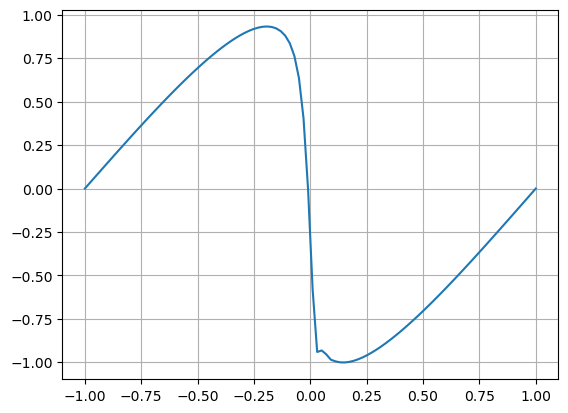

In [114]:
plt.plot(x_loc,Y_rec[7000,:])
plt.grid()